<a href="https://colab.research.google.com/github/umeshnmenon/EVA4/blob/master/EVA4_S5_Assmnt_Notebook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Target:
    ## 1. Increase the capacity of model.

# Result:
   ## 1. Parameters:9,980
   ## 2. Best train accuracy:98.89
   ## 3. Best test accuracy:99.37(15th epoch)

# Analysis:
   ## 1. We got test accuracy: 99.47 and 99.45 (17th and 19th epoch).
   ## 2. The model is not over fitting .
   ## 3. By seeing images all numbers are not in same shape.so,Add rotation
   

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Sequential(nn.Conv2d(1,16,3,padding=0,bias=False),           #conv1  1 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),
                                 nn.BatchNorm2d(16),                               #RF:3
                                 nn.Dropout2d(0.04))
                                                                                   #O/P:26
                                                                                          
        
        self.conv2=nn.Sequential(nn.Conv2d(16,32,3,padding=0,bias=False),          #conv2  16 input , 32 0utput and 3x3 kernel
                                 nn.ReLU(),
                                 nn.BatchNorm2d(32),                               #RF:5
                                 nn.Dropout2d(0.04))
                                                                                   #O/P:24



        # used 1x1 kernel 
        self.conv3=nn.Sequential(nn.Conv2d(32,8,1,bias=False))                    #conv3  32 input , 8 0utput and 1x1 kernel 

                                                                                  #RF:5
                                 
                                                                                   #o/p:24


        self.maxpool=nn.MaxPool2d(2,2)                                            # maxpooling 2x2 kernel and stride 2
                
                                                                                  #RF:6
        
                                                                                  #o/p:12
                                                                           
        
     

        self.conv4=nn.Sequential(nn.Conv2d(8,14,3,padding=0,bias=False),           #conv4  8 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                                        #RF:10
                                 nn.BatchNorm2d(14),                               #o/p:10
                                 nn.Dropout2d(0.04))
                                                                                       
        
        self.conv5=nn.Sequential(nn.Conv2d(14,16,3,padding=0,bias=False),          #conv5  16 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                                        #RF:14  
                                 nn.BatchNorm2d(16),                               #o/p:8
                                 nn.Dropout2d(0.04))                                                
                                                                                   
                                                                
        
        #self.maxpool=nn.MaxPool2d(2,2)
                                                               
        self.conv6=nn.Sequential(nn.Conv2d(16,10,1,padding=0,bias=False))         #conv6  16 input , 16 0utput and 3x3 kernel
                                                                                  #RF:14
        
                                                                                  #o/p:8



        self.conv7=nn.Sequential(nn.Conv2d(10,16,3,padding=0,bias=False),         #conv6  16 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                                        #RF:18
                                 nn.BatchNorm2d(16),                               #O/P:6
                                 nn.Dropout2d(0.04)) 
                                 
                                                                        
                                                                                 
        
        self.GAP=nn.AvgPool2d(6)                                                   # Gobal Average Pooling 
                                                                                    #RF:28
                                                                                     #o/p:1



        self.conv8 = nn.Sequential(nn.Conv2d(16,10,1, padding=0, bias=False))       #RF:28
                                                                                    #O/P:1                                            
       
             
    def forward(self,x):
        x=self.conv1(x)
        x=self.conv2(x)
       # x=self.maxpool(x)
        x=self.conv3(x)
        x=self.maxpool(x)
        x=self.conv4(x)
        x=self.conv5(x)
        #x=self.maxpool(x)
        x=self.conv6(x)
        x=self.conv7(x)
        x=self.GAP(x)
        x=self.conv8(x)
        x=x.view(-1,10)
        return F.log_softmax(x)


!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
         Dropout2d-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
         Dropout2d-8           [-1, 32, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             256
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,008
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
        Dropout2d-14           [-1, 14,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                       # transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

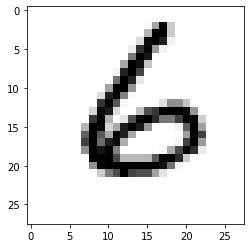

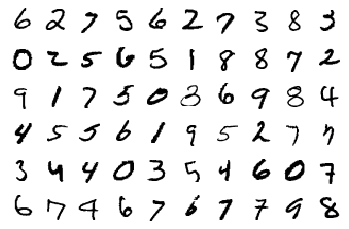

In [0]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[1].numpy().squeeze(), cmap='gray_r')

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [0]:


model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20):
    print("epoches:",epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

epoches: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=0.15206439793109894 Batch_id=468 Accuracy=84.89: 100%|██████████| 469/469 [00:12<00:00, 38.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0944, Accuracy: 9759/10000 (97.59%)

epoches: 2


Loss=0.052887529134750366 Batch_id=468 Accuracy=96.84: 100%|██████████| 469/469 [00:11<00:00, 40.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0545, Accuracy: 9849/10000 (98.49%)

epoches: 3


Loss=0.0669248029589653 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:12<00:00, 38.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0438, Accuracy: 9867/10000 (98.67%)

epoches: 4


Loss=0.03953668102622032 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:11<00:00, 39.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9896/10000 (98.96%)

epoches: 5


Loss=0.0985371544957161 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:11<00:00, 41.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9902/10000 (99.02%)

epoches: 6


Loss=0.16733527183532715 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:11<00:00, 42.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9919/10000 (99.19%)

epoches: 7


Loss=0.03427975997328758 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:11<00:00, 40.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9928/10000 (99.28%)

epoches: 8


Loss=0.15539579093456268 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:11<00:00, 39.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 9925/10000 (99.25%)

epoches: 9


Loss=0.07415609061717987 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:11<00:00, 39.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9925/10000 (99.25%)

epoches: 10


Loss=0.019549215212464333 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:11<00:00, 39.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9924/10000 (99.24%)

epoches: 11


Loss=0.0045219361782073975 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:11<00:00, 40.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9935/10000 (99.35%)

epoches: 12


Loss=0.055117711424827576 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:11<00:00, 43.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9937/10000 (99.37%)

epoches: 13


Loss=0.01718052662909031 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:11<00:00, 40.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9935/10000 (99.35%)

epoches: 14


Loss=0.09133448451757431 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:11<00:00, 39.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9924/10000 (99.24%)

epoches: 15


Loss=0.014232481829822063 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:11<00:00, 39.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9937/10000 (99.37%)

epoches: 16


Loss=0.04042308032512665 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:11<00:00, 40.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9938/10000 (99.38%)

epoches: 17


Loss=0.014860938303172588 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:11<00:00, 40.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9947/10000 (99.47%)

epoches: 18


Loss=0.06863411515951157 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:11<00:00, 39.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9932/10000 (99.32%)

epoches: 19


Loss=0.03157958388328552 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:11<00:00, 39.46it/s]



Test set: Average loss: 0.0213, Accuracy: 9945/10000 (99.45%)

